In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.special as ssp
import iopro
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

In [3]:
def plot_sample1d(fname, 
            ax_x=None, ax_y=None,
               axis_fontsize=20, tick_labelsize=16, linestyle='None', marker='.', color='k',
               **kwargs):
    
    # require the user to provide at least 1 axes.
    if ax_x is None and ax_y is None:
        raise RuntimeError('You must provide either ax1 or ax2.')
    
    # compute histogram density and its errors.
    sample = iopro.genfromtxt(fname)
    bx, ex, dx = 0, 0.2, 0.001; by, ey, dy = 0, 1, 0.01;
    ctx, edgex = np.histogram(sample[:,0], bins=np.arange(bx-dx/2, ex, step=dx))
    cty, edgey = np.histogram(sample[:,1], bins=np.arange(by-dy/2, ey, step=dy))
    edgex += dx/2; edgey += dy/2;
    ctx_err = np.sqrt(np.power(np.sum(ctx), -2.0) * ctx + 
                      np.sum(ctx) * np.power(np.sum(ctx), -4.0) * np.power(ctx, 2.0))
    ctx = ctx / np.sum(ctx).astype(float)
    ctx /= dx; ctx_err /= dx;
    cty_err = np.sqrt(np.power(np.sum(cty), -2.0) * cty + 
                      np.sum(cty) * np.power(np.sum(cty), -4.0) * np.power(cty, 2.0))
    cty = cty / np.sum(cty).astype(float)
    cty /= dy; cty_err /= dy;
   
        
    if ax_x: 
        ax_x.errorbar(edgex[:-1], ctx, yerr=ctx_err, linestyle=linestyle, marker=marker, color=color)
        ax_x.set_xlabel('signal score', fontsize=axis_fontsize)
        ax_x.tick_params(axis='both', which='major', labelsize=tick_labelsize)
        
    if ax_y: 
        ax_y.errorbar(edgey[:-1], cty, yerr=cty_err, linestyle=linestyle, marker=marker, color=color)
        ax_y.set_xlabel(r'$D^*\tau$ score', fontsize=axis_fontsize)
        ax_y.tick_params(axis='both', which='major', labelsize=tick_labelsize)
        

In [4]:
def plot_kde1d(kde1d_fname, 
               ax_x=None, ax_y=None,
               axis_fontsize=20, tick_labelsize=16,
               conf_band=False,
               alpha_conf=0.05, color='b',
               **kwargs):
    
    # require the user to provide at least 1 axes.
    if ax_x is None and ax_y is None:
        raise RuntimeError('You must provide either ax1 or ax2.')
        
    hx, hy, x, y, fx, fx_se, fy, fy_se = 0, 0, [], [], [], [], [], []
    with open(kde1d_fname, 'r') as f:
        hx, hy = map(float, f.next().strip().split())
        x = np.array(map(float, f.next().strip().split()))
        y = np.array(map(float, f.next().strip().split()))
        fx = np.array(map(float, f.next().strip().split()))
        fx_se = np.array(map(float, f.next().strip().split()))
        fy = np.array(map(float, f.next().strip().split()))
        fy_se = np.array(map(float, f.next().strip().split()))
        
    # compute confidence bands
    probit = lambda(p) : np.sqrt(2)*ssp.erfinv(2*p-1)
    mx, my = 1/(3*hx), 1/(3*hy)
    qx, qy = probit((1+(1-alpha_conf)**(1/mx))/2), probit((1+(1-alpha_conf)**(1/my))/2)
    lx, ux = fx-qx*fx_se, fx+qx*fx_se
    ly, uy = fy-qy*fy_se, fy+qy*fy_se
    
    if ax_x: 
        ax_x.plot(x, fx, color=color, **kwargs)
        if conf_band:
            ax_x.plot(x, lx, color=color, linestyle='--', **kwargs)
            ax_x.plot(x, ux, color=color, linestyle='--', **kwargs)
        ax_x.set_xlabel('signal score', fontsize=axis_fontsize)
        ax_x.tick_params(axis='both', which='major', labelsize=tick_labelsize)
        
    if ax_y: 
        ax_y.plot(y, fy, **kwargs)
        if conf_band:
            ax_y.plot(y, ly, color=color, linestyle='--', **kwargs)
            ax_y.plot(y, uy, color=color, linestyle='--', **kwargs)
        ax_y.set_xlabel(r'$D^*\tau$ score', fontsize=axis_fontsize)
        ax_y.tick_params(axis='both', which='major', labelsize=tick_labelsize)
        

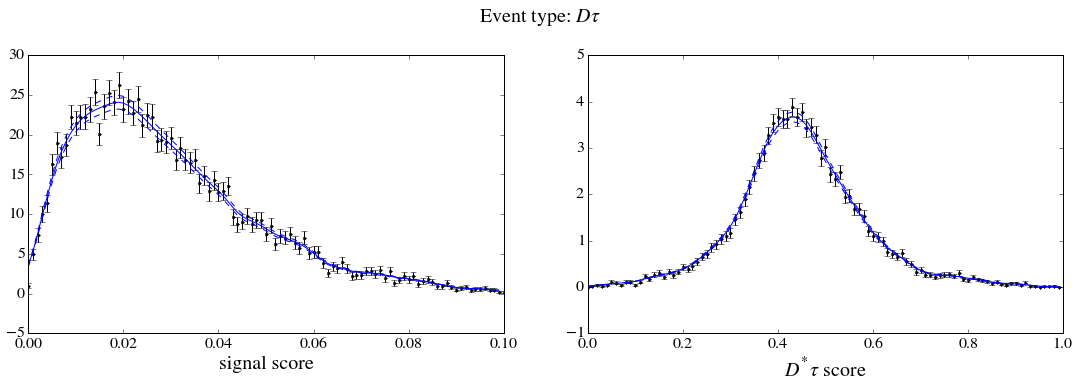

In [5]:
fig = plt.figure(figsize=(10*1.618, 6))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_sample1d('data/evttype1.cv.csv', ax_x, ax_y)
plot_kde1d('contour/evttype1.1d.opt.txt', ax_x=ax_x, ax_y=ax_y, conf_band=True)
fig.suptitle(r'Event type: $D\tau$', fontsize=20)
ax_x.set_xbound(0,0.1)
plt.tight_layout(pad=5)

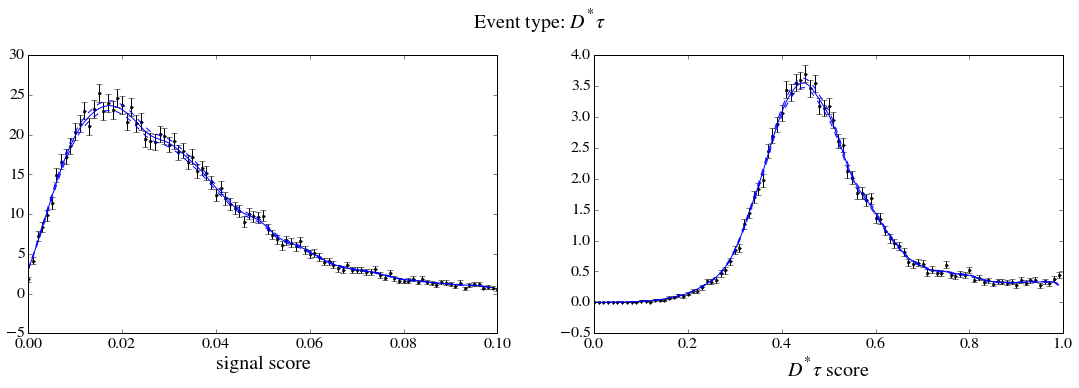

In [6]:
fig = plt.figure(figsize=(10*1.618, 6))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_sample1d('data/evttype2.cv.csv', ax_x, ax_y)
plot_kde1d('contour/evttype2.1d.opt.txt', ax_x=ax_x, ax_y=ax_y, conf_band=True)
fig.suptitle(r'Event type: $D^*\tau$', fontsize=20)
ax_x.set_xbound(0,0.1)
plt.tight_layout(pad=5)

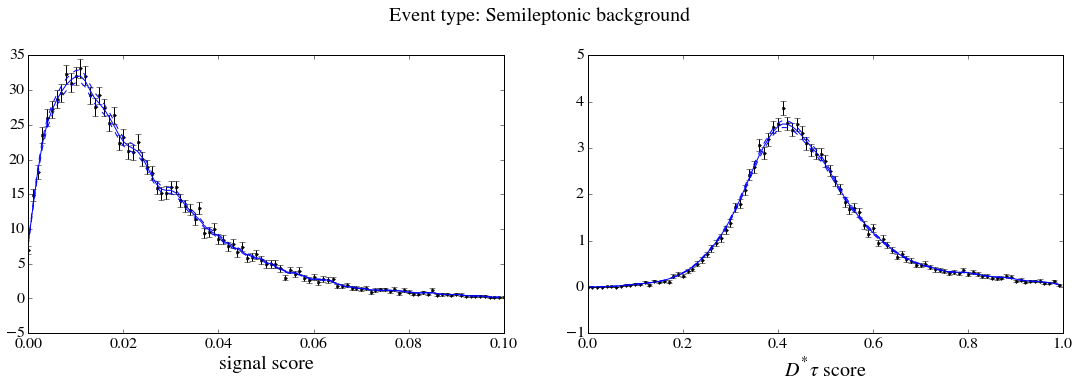

In [7]:
fig = plt.figure(figsize=(10*1.618, 6))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_sample1d('data/evttype3.cv.csv', ax_x, ax_y)
plot_kde1d('contour/evttype3.1d.opt.txt', ax_x=ax_x, ax_y=ax_y, conf_band=True)
fig.suptitle(r'Event type: Semileptonic background', fontsize=20)
ax_x.set_xbound(0,0.1)
plt.tight_layout(pad=5)

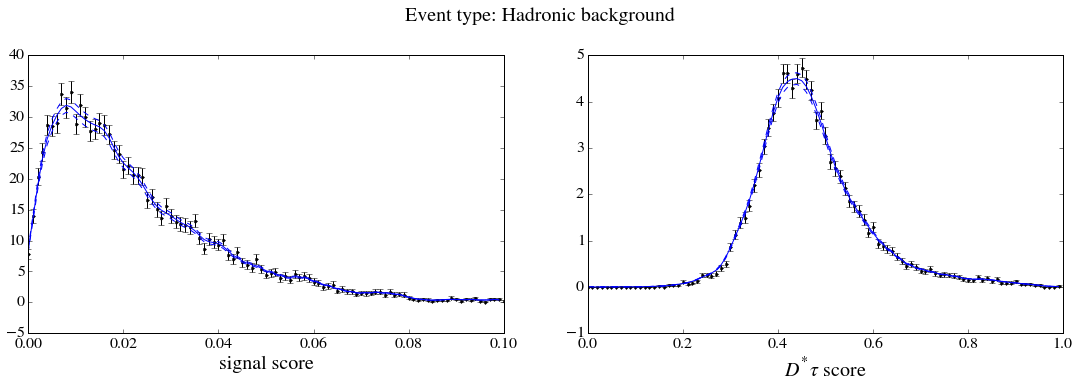

In [8]:
fig = plt.figure(figsize=(10*1.618, 6))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_sample1d('data/evttype4.cv.csv', ax_x, ax_y)
plot_kde1d('contour/evttype4.1d.opt.txt', ax_x=ax_x, ax_y=ax_y, conf_band=True)
fig.suptitle(r'Event type: Hadronic background', fontsize=20)
ax_x.set_xbound(0,0.1)
plt.tight_layout(pad=5)

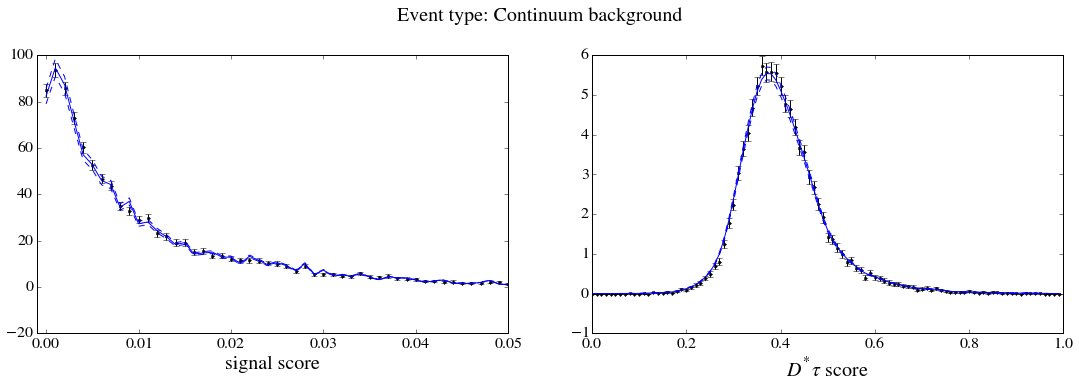

In [9]:
fig = plt.figure(figsize=(10*1.618, 6))
ax_x, ax_y = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
plot_sample1d('data/evttype5.cv.csv', ax_x, ax_y)
plot_kde1d('contour/evttype5.1d.opt.txt', ax_x=ax_x, ax_y=ax_y, conf_band=True)
fig.suptitle(r'Event type: Continuum background', fontsize=20)
ax_x.set_xbound(-0.001,0.05)
plt.tight_layout(pad=5)